# Machine Learning Project

## Predict House price from King County

## Problem statement:

#### To predict the price of houses in an area purely based on machine learning algorithm
#### A perspective buyer looking for a house price with various features, the buyer has to go to lot of hustle and bustle to get the right amount, it can be used to predict the expect price of the house looking forward to buy, so successful negotiation for price of the house. This can be used by the buyer as well as the seller for negotiation which is purely on the data without any intervention from brokers and commissions 


### Objective:

#### To predict the price of each houses 
#### Reduce the  RMSE

### DATA

### Libraries used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the data

In [2]:
housedata = pd.read_csv('wk3_kc_house_train_data.csv')

## Exploratory Data Analysis

#### Shape of the data

In [3]:
housedata.shape

(9761, 21)

#### Column names

In [4]:
housedata.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

#### Checking data types of the variables

In [5]:
housedata.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

#### Checking for null values

In [6]:
housedata.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

####  No null values in the data

## Univariate Analysis

### Plotting histogram of each variable

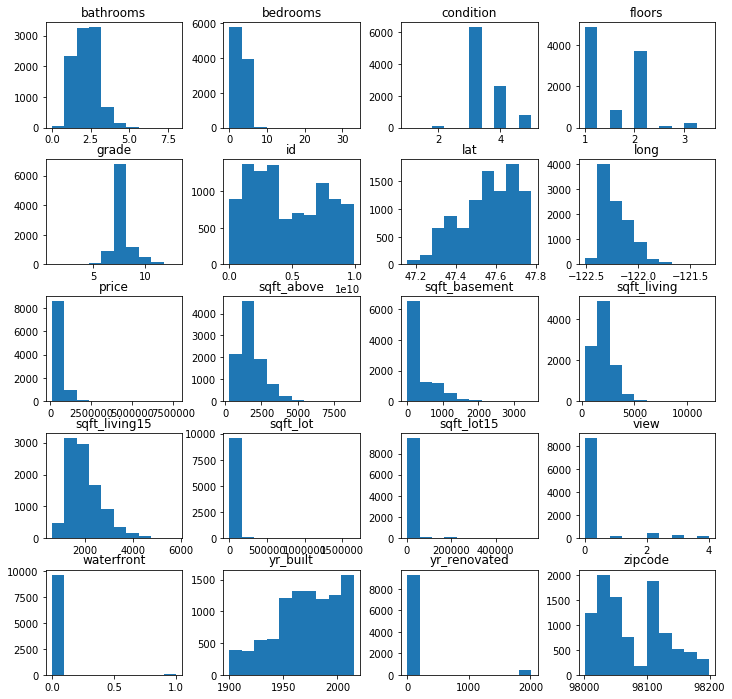

In [7]:
housedata.hist(figsize=(12,12), grid = False)
plt.show()

In [8]:
import seaborn as sns

### sqft_living

Text(0.5, 1.0, 'Histogram of sqft_living')

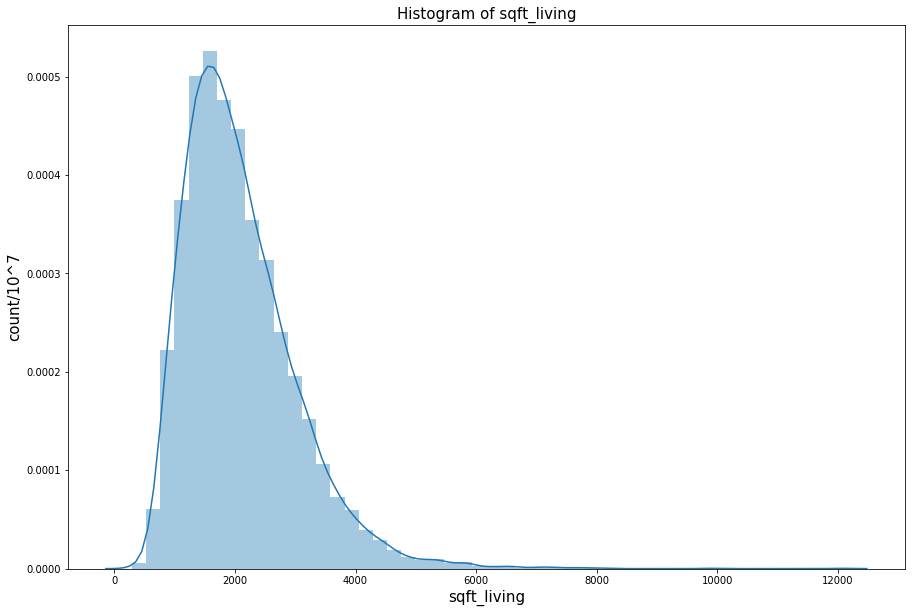

In [9]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.distplot(housedata['sqft_living'],hist=True,kde=True,rug=False,label='sqft_living',norm_hist=True)
plt.xlabel('sqft_living',fontsize=15)
plt.ylabel('count/10^7',fontsize=15)
plt.title('Histogram of sqft_living',fontsize=15)

Text(0.5, 1.0, 'Sqft living')

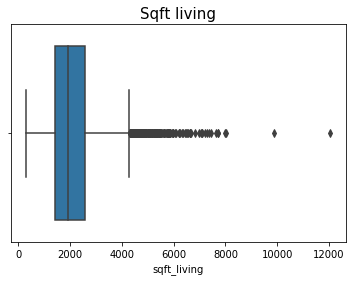

In [10]:
sns.boxplot(housedata.sqft_living)
plt.title('Sqft living',fontsize=15)

Text(0.5, 1.0, 'Histogram of log transformation sqft_living')

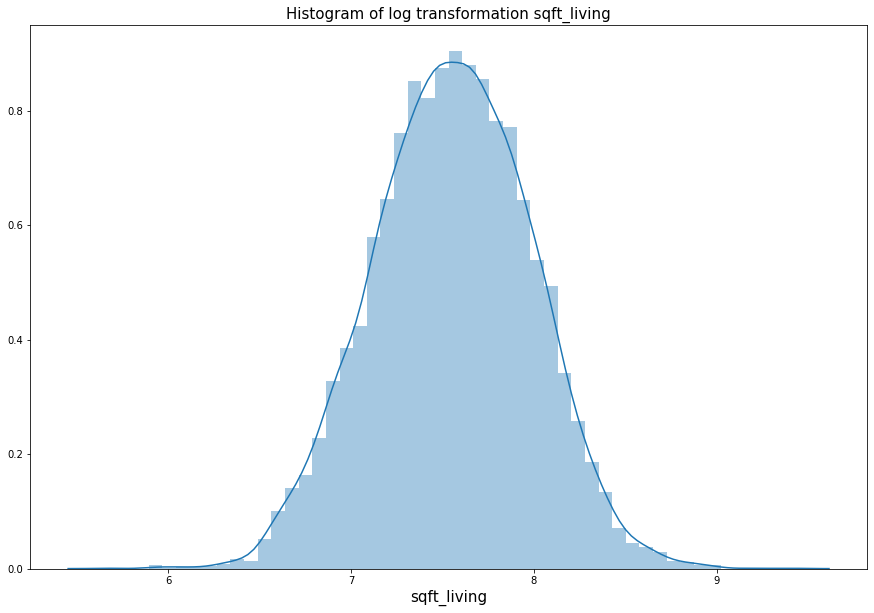

In [11]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.distplot(np.log(housedata['sqft_living']),hist=True,kde=True,rug=False,label='sqft_living',norm_hist=True)
plt.xlabel('sqft_living',fontsize=15)
plt.title('Histogram of log transformation sqft_living',fontsize=15)

####  From the graph we can infer that the graph is right skewed since the majority of the houses are of the medium sizes and large size houses are small in numbers. And we can see that on taking log transformation of the variable the graph is symmetrical

### sqft_lot

Text(0.5, 1.0, 'Histogram of sqft_lot')

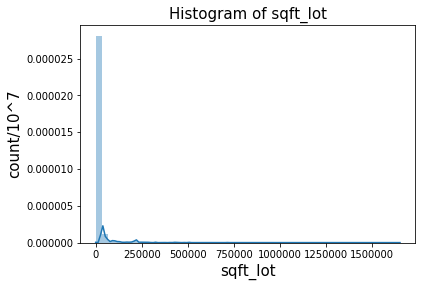

In [12]:
sns.distplot(housedata['sqft_lot'],hist=True,kde=True,rug=False,label='sqft_living',norm_hist=True)
plt.xlabel('sqft_lot',fontsize=15)
plt.ylabel('count/10^7',fontsize=15)
plt.title('Histogram of sqft_lot',fontsize=15)

Text(0.5, 1.0, 'sqft_lot boxplot')

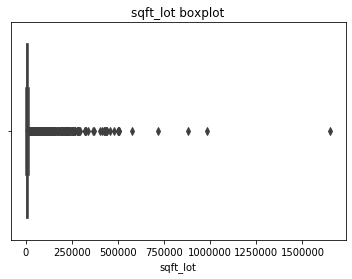

In [13]:
sns.boxplot(housedata.sqft_lot)
plt.title('sqft_lot boxplot')

Text(0.5, 1.0, 'Histogram of log transformation sqft_lot')

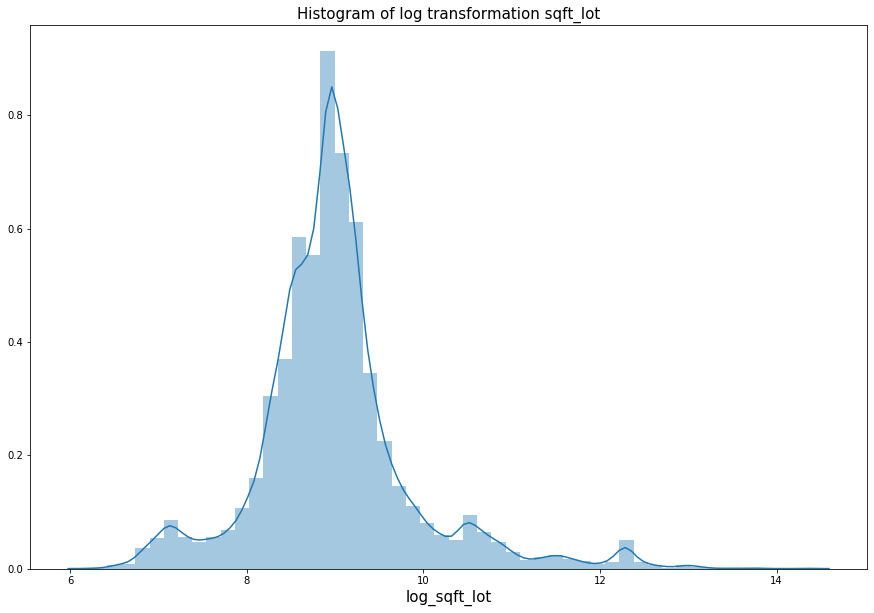

In [14]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.distplot(np.log(housedata['sqft_lot']),hist=True,kde=True,rug=False,label='sqft_living',norm_hist=True)
plt.xlabel('log_sqft_lot',fontsize=15)
plt.title('Histogram of log transformation sqft_lot',fontsize=15)

#### From the graphs we can infer that the variable highly right skewed. And on taking the log transformation of the variable we can see the graph to be symmetrical.

### sqft_above

Text(0.5, 1.0, 'Histogram of sqft_above')

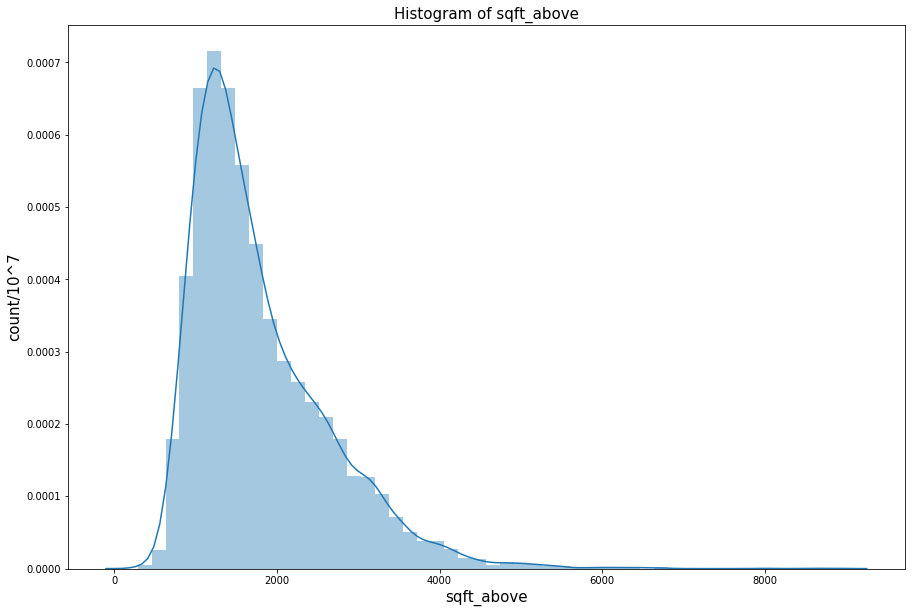

In [15]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.distplot(housedata['sqft_above'],hist=True,kde=True,rug=False,label='sqft_living',norm_hist=True)
plt.xlabel('sqft_above',fontsize=15)
plt.ylabel('count/10^7',fontsize=15)
plt.title('Histogram of sqft_above',fontsize=15)

Text(0.5, 1.0, 'sqft_above boxplot')

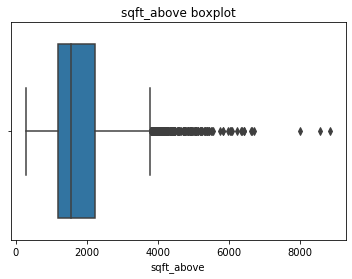

In [16]:
sns.boxplot(housedata.sqft_above)
plt.title('sqft_above boxplot')

Text(0.5, 1.0, 'Histogram of log tranformation of sqft_above')

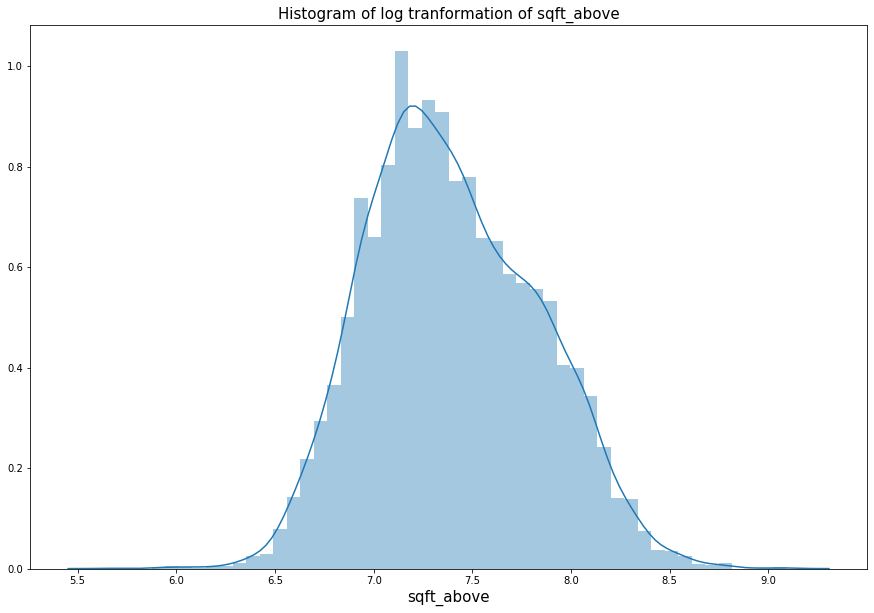

In [17]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.distplot(np.log(housedata['sqft_above']),hist=True,kde=True,rug=False,label='sqft_living',norm_hist=True)
plt.xlabel('sqft_above',fontsize=15)
plt.title('Histogram of log tranformation of sqft_above',fontsize=15)

#### From the graphs we can infer that the distribution is right skewed since majority of the houses are having less area in the subsequent floors. And further on taking the log transformation the distribution approaches to symmetry.

### Bedrooms

Text(0.5, 1.0, 'Bar plot of bedrooms')

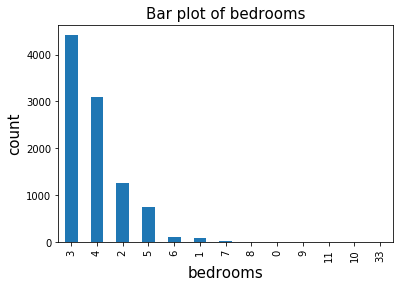

In [18]:
housedata.bedrooms.value_counts().plot(kind='bar')
plt.xlabel('bedrooms',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('Bar plot of bedrooms',fontsize=15)

#### It can be inferred that more number of houses are with bedrooms 3 & 4.

### Bathrooms

Text(0.5, 1.0, 'Bar plot of bathrooms')

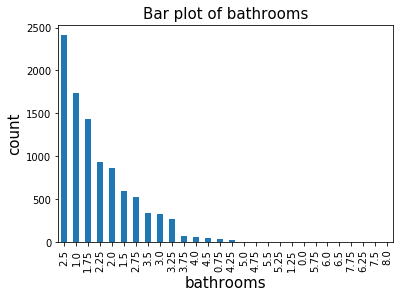

In [19]:
housedata.bathrooms.value_counts().plot(kind='bar')
plt.xlabel('bathrooms',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('Bar plot of bathrooms',fontsize=15)

#### Majority of the homes are having 1,2.5 and 1.75 bathrooms

## Bi variate Analysis

## Correlation between variables

In [20]:
corr_matrix = housedata.corr()
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.005972,-0.002571,0.005821,-0.007559,-0.130303,0.007793,0.000834,0.023355,-0.015321,0.012491,-0.006447,-0.003660,0.027053,-0.024900,-0.012130,0.009167,0.034395,-0.001315,-0.137562
price,-0.005972,1.000000,0.300808,0.527532,0.705052,0.094143,0.262954,0.274977,0.399658,0.044732,0.665567,0.611453,0.322383,0.051759,0.120472,-0.055629,0.299280,0.023754,0.584807,0.077943
bedrooms,-0.002571,0.300808,1.000000,0.506070,0.560989,0.028895,0.181042,-0.006803,0.079863,0.036135,0.342305,0.462514,0.301829,0.155102,0.018625,-0.148339,-0.010547,0.117168,0.376457,0.018149
bathrooms,0.005821,0.527532,0.506070,1.000000,0.758930,0.079435,0.501899,0.061483,0.182988,-0.115382,0.660925,0.692911,0.281433,0.499589,0.044756,-0.201454,0.018453,0.217697,0.566076,0.068722
sqft_living,-0.007559,0.705052,0.560989,0.758930,1.000000,0.162786,0.366219,0.097203,0.285735,-0.047938,0.764819,0.878989,0.435069,0.322723,0.043627,-0.203761,0.054830,0.240170,0.758081,0.163545
sqft_lot,-0.130303,0.094143,0.028895,0.079435,0.162786,1.000000,-0.003543,0.029420,0.099221,-0.008722,0.115611,0.180913,-0.000601,0.054043,0.001219,-0.126091,-0.092245,0.224524,0.145285,0.719922
floors,0.007793,0.262954,0.181042,0.501899,0.366219,-0.003543,1.000000,0.022443,0.031938,-0.265390,0.461545,0.534801,-0.242675,0.481926,0.013655,-0.064479,0.044827,0.134683,0.289238,-0.013269
waterfront,0.000834,0.274977,-0.006803,0.061483,0.097203,0.029420,0.022443,1.000000,0.402725,0.024030,0.088039,0.064297,0.082214,-0.027010,0.101684,0.023656,-0.009410,-0.039227,0.097196,0.028499
view,0.023355,0.399658,0.079863,0.182988,0.285735,0.099221,0.031938,0.402725,1.000000,0.059969,0.258123,0.170286,0.277021,-0.056361,0.109750,0.075834,0.005503,-0.074630,0.292435,0.079904
condition,-0.015321,0.044732,0.036135,-0.115382,-0.047938,-0.008722,-0.265390,0.024030,0.059969,1.000000,-0.133313,-0.153713,0.189828,-0.357396,-0.055525,0.003410,-0.017622,-0.106514,-0.080423,0.002253


## Graphical representation of the correlation matrix - heatmap

### Heat map with correlation values embedded

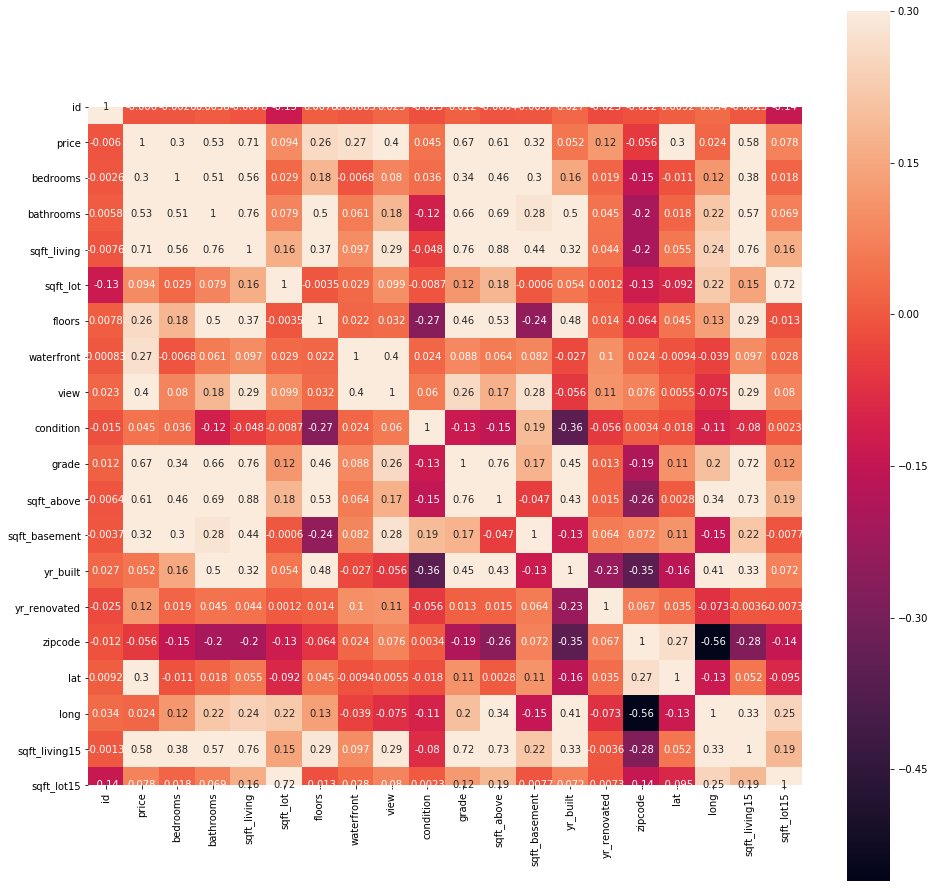

In [21]:
mask = np.zeros_like(corr_matrix)

f, ax = plt.subplots(figsize=(16,16))
ax = sns.heatmap(corr_matrix, mask=mask, vmax=.3, square=True,annot=True)

# Heat map correlation values

## Scatter Matrix

In [22]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(housedata, alpha=0.5, figsize=(14,14), diagonal = 'hist')
#plt.show()

## Plots of highly correlated variable with price

### Price vs sqft_living

Text(0, 0.5, 'Price')

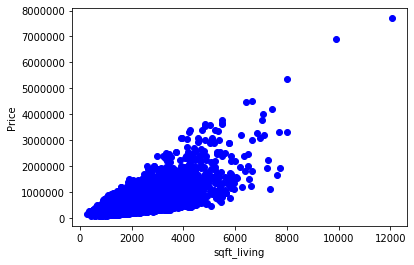

In [23]:
plt.scatter(x=housedata.sqft_living,y=housedata.price,color='blue')
plt.xlabel('sqft_living')
plt.ylabel('Price')

### Log transformation of (price vs sqft_living)

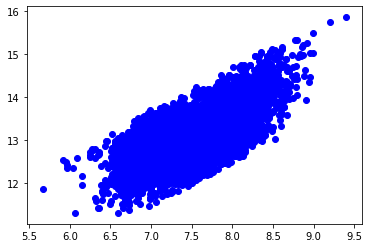

In [24]:
plt.scatter(x= np.log(housedata.sqft_living),y=np.log(housedata.price),color = 'blue') #log of the values gives a linear pattern


#### From the graphs we can see that there is some relation between the two variables and on log transformation a linear relation among the variables.

### Price vs sqft_above

Text(0, 0.5, 'Price')

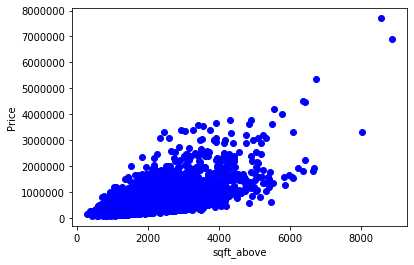

In [25]:
plt.scatter(x=housedata.sqft_above,y=housedata.price,color='blue')
plt.xlabel('sqft_above')
plt.ylabel('Price')

### Log transformation of (price vs sqft_above)

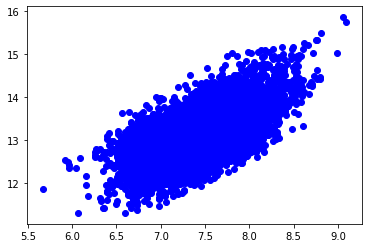

In [26]:
plt.scatter(x= np.log(housedata.sqft_above),y=np.log(housedata.price),color = 'blue') #log of the values gives a linear pattern


#### From the graphs we can see that there is some relation between the two variables and on log transformation a linear relation among the variables.

### Price variation with Zipcodes

Text(0.5, 1.0, 'Price variation with zipcode')

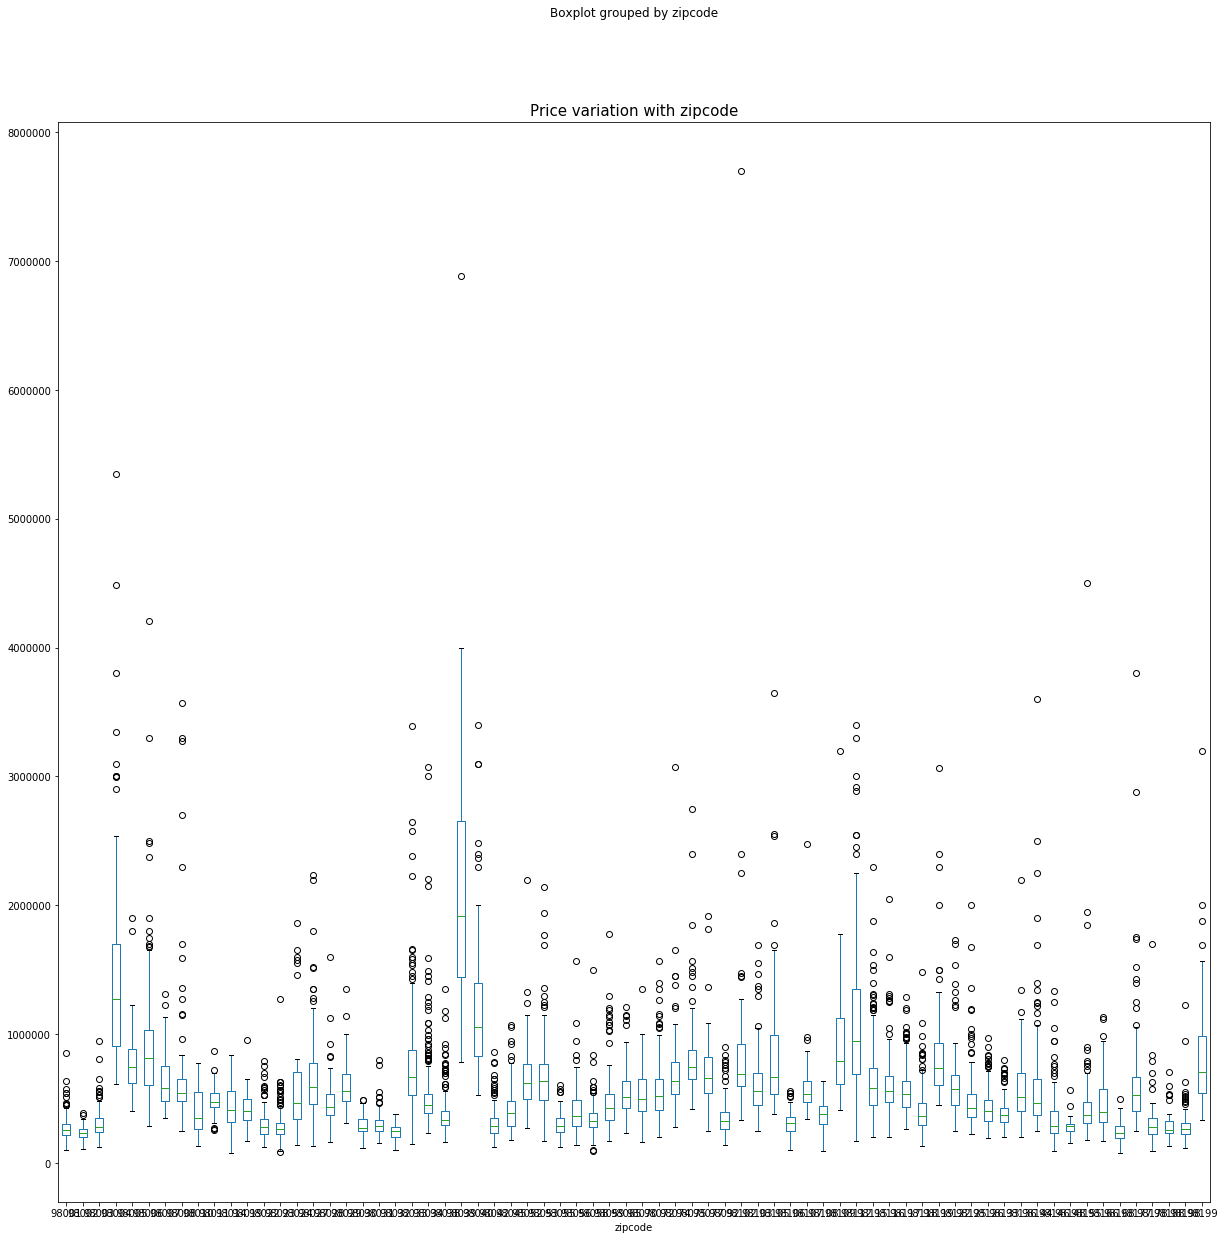

In [27]:
housedata.boxplot(column='price',by='zipcode',grid=False,figsize=(20,20))
plt.title('Price variation with zipcode', fontsize=15)

#### There are zipcodes with house prices which indicates that it’s a posh area. And in some areas the prices are relatively low.

### Price variation with Grade

Text(0.5, 1.0, 'Price variation with grade')

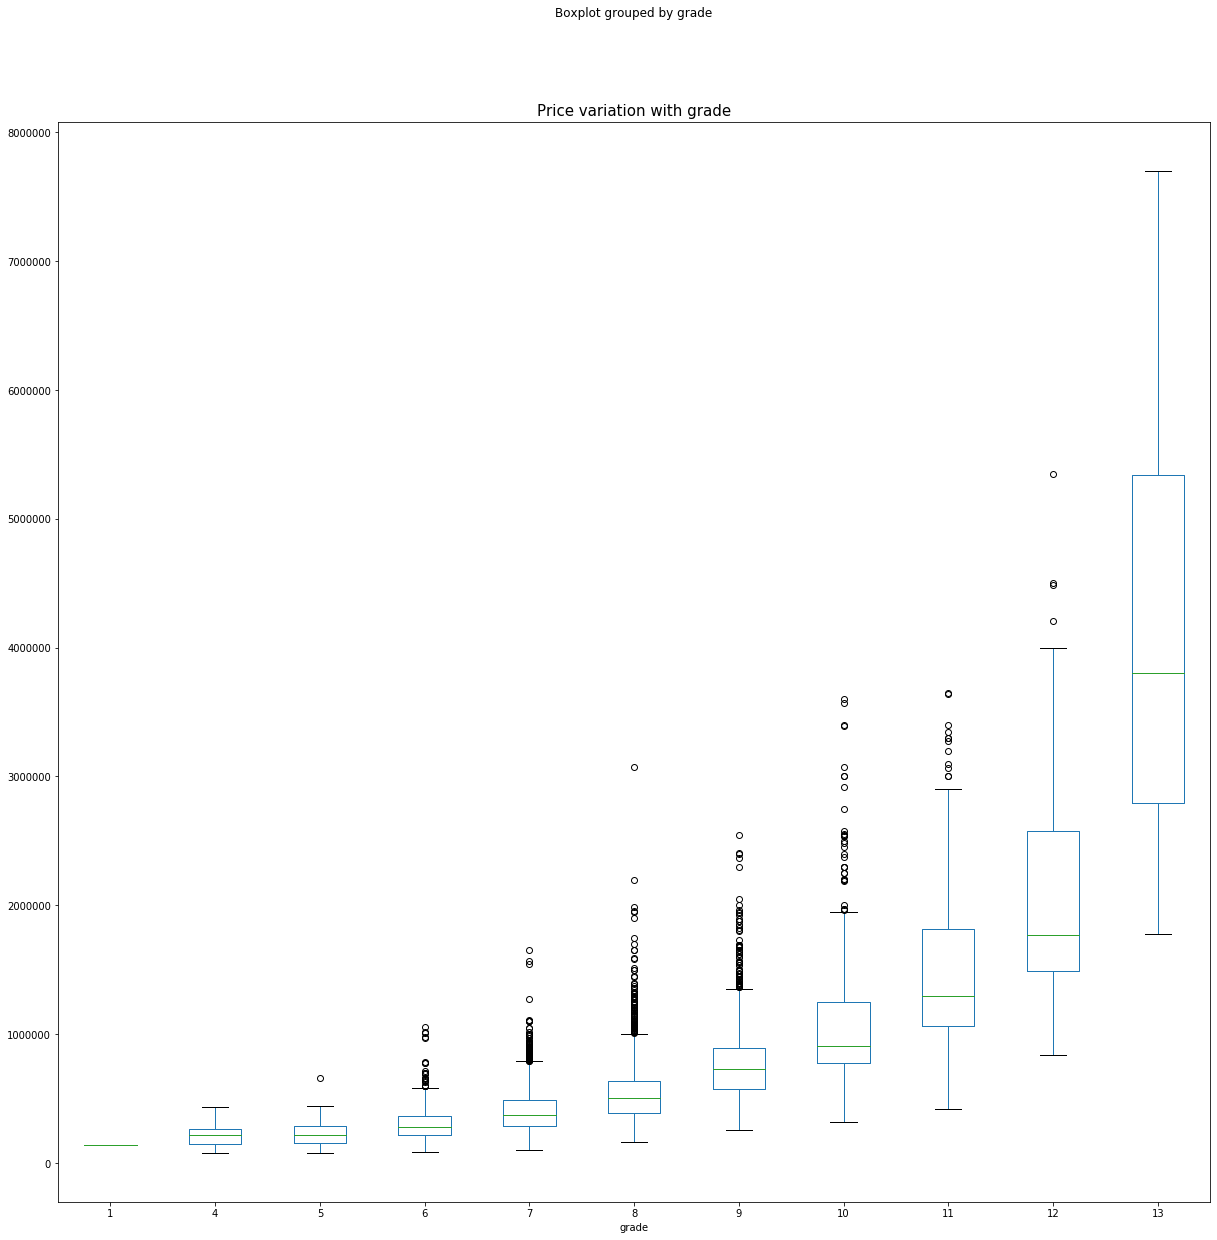

In [28]:
housedata.boxplot(column='price',by='grade',grid=False,figsize=(20,20))
plt.title('Price variation with grade', fontsize=15)

#### As the grade of the house is increase the price too is increasing 

## How various features are influencing the price of the houses

In [29]:
housedata[housedata.price == housedata.price.min()] #how house price is varying with the features (minimum)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
213,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


In [30]:
housedata[housedata.price == housedata.price.max()] #how house price is varying with the features (maximum)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3303,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


In [31]:
housedata[housedata.price == housedata.price.median()] #how house price is varying with the features (median)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
182,7821200390,20140806T000000,450000.0,3,2.00,1290,1213,3.0,0,0,...,8,1290,0,2001,0,98103,47.6609,-122.344,1290,3235
395,2296500036,20150310T000000,450000.0,4,2.75,2980,13260,1.0,0,0,...,8,1800,1180,1979,0,98056,47.5152,-122.197,1920,10731
613,217500135,20150421T000000,450000.0,4,2.25,2040,9565,1.0,0,0,...,8,1400,640,1959,0,98133,47.7356,-122.335,1890,8580
614,3731800055,20140605T000000,450000.0,4,1.00,2000,4676,1.5,0,0,...,7,1250,750,1916,1986,98118,47.5529,-122.268,1140,4676
626,9468200140,20140819T000000,450000.0,2,1.75,1250,2890,1.0,0,0,...,7,790,460,1920,0,98103,47.6795,-122.353,1500,3225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8892,3204300610,20141202T000000,450000.0,2,1.00,950,4560,1.5,0,0,...,7,950,0,1925,0,98112,47.6288,-122.300,2040,4560
8905,224059021,20141219T000000,450000.0,3,1.00,1150,35415,1.0,0,0,...,7,1010,140,1950,0,98008,47.5974,-122.129,2460,11781
8965,4019500030,20141029T000000,450000.0,3,2.50,2280,4557,2.0,0,0,...,8,2280,0,2010,0,98028,47.7733,-122.266,2070,4610
8983,2867300160,20140904T000000,450000.0,5,3.50,3931,9497,2.0,0,0,...,10,2650,1281,2014,0,98023,47.3008,-122.386,3510,9497


In [32]:
housedata[housedata.view == 1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
177,1923000030,20140728T000000,1118000.0,4,2.50,3840,16619,2.0,0,1,...,10,3840,0,1983,0,98040,47.5634,-122.213,3600,16553
216,8820902200,20141113T000000,1199000.0,4,2.75,4110,8400,2.0,0,1,...,9,3130,980,1928,2013,98125,47.7170,-122.281,2820,8400
224,5423010350,20150210T000000,1280000.0,5,2.50,3400,9500,2.0,0,1,...,8,3400,0,1977,0,98027,47.5645,-122.082,3080,11081
258,5486800070,20140620T000000,1950000.0,7,3.50,4640,15235,2.0,0,1,...,11,2860,1780,1965,2003,98040,47.5666,-122.231,3230,20697
336,9277200111,20140714T000000,650000.0,4,1.75,2010,5070,1.0,0,1,...,7,1300,710,1963,0,98116,47.5793,-122.402,2180,5400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266,9808100150,20150402T000000,3345000.0,5,3.75,5350,15360,1.0,0,1,...,11,3040,2310,2008,0,98004,47.6480,-122.218,3740,15940
9464,3864000120,20150408T000000,1175000.0,4,3.25,3780,10099,1.0,0,1,...,11,2240,1540,2006,0,98006,47.5508,-122.192,3120,10669
9509,6447300365,20141113T000000,2900000.0,5,4.00,5190,14600,2.0,0,1,...,11,5190,0,2013,0,98039,47.6102,-122.225,3840,19250
9528,8562900430,20140718T000000,800000.0,4,2.50,3691,11088,2.0,0,1,...,8,3691,0,2013,0,98074,47.6122,-122.059,3190,11270


#### The price of the house increases with the features

### Anomaly detection

Text(0.5, 1.0, 'Price variation with bedroom')

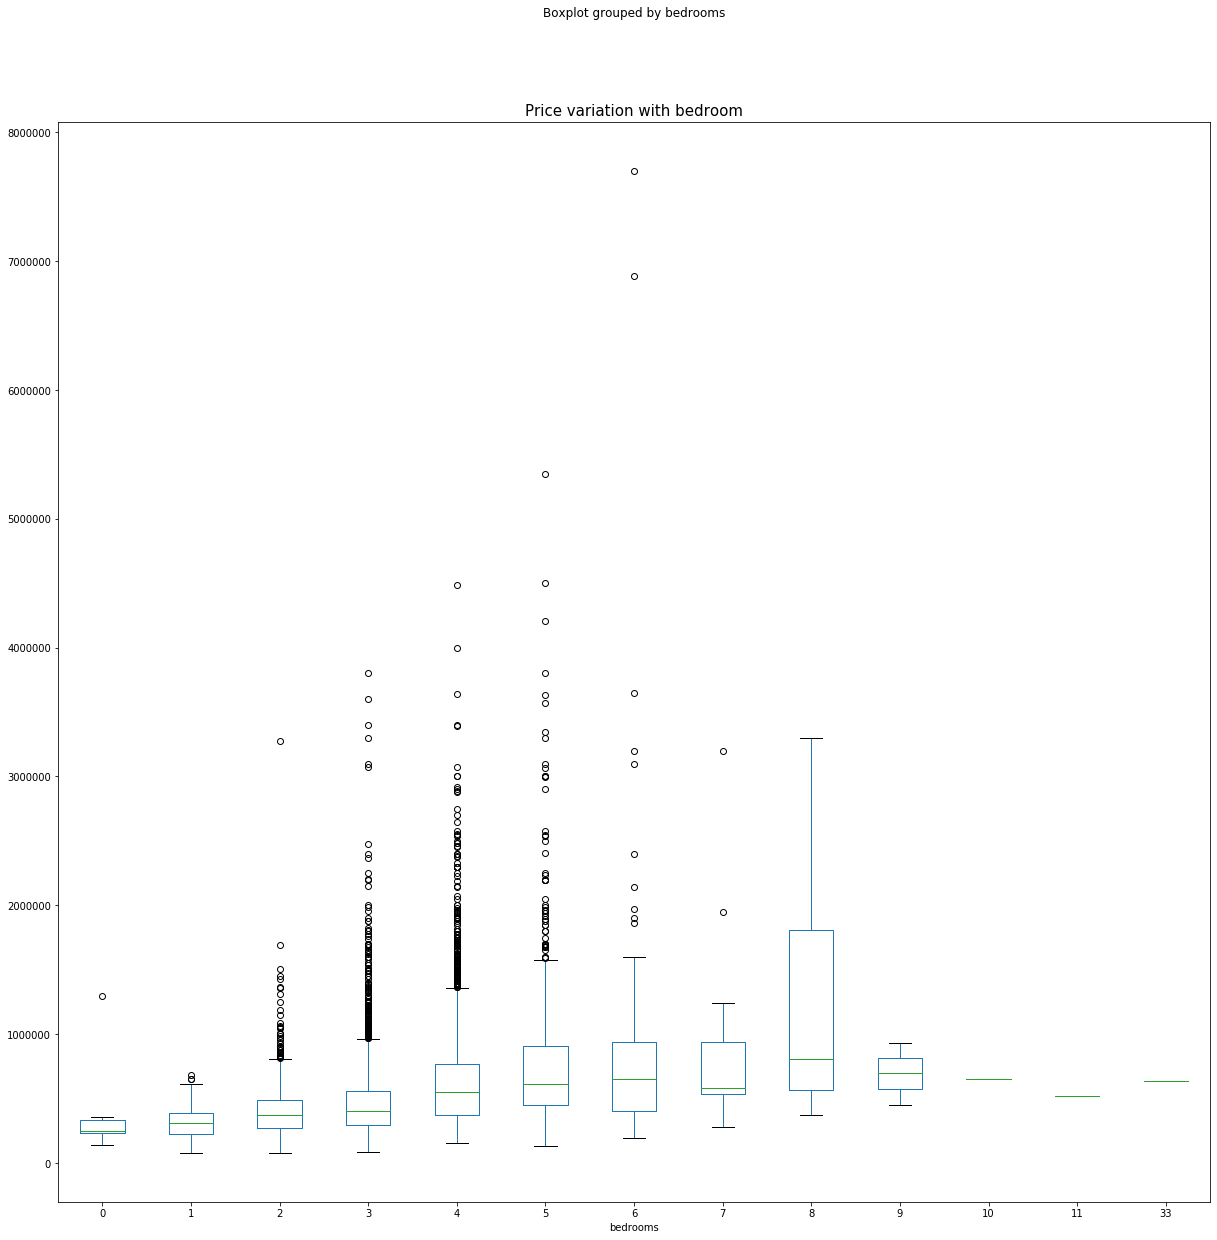

In [33]:
housedata.boxplot(column='price',by='bedrooms',grid=False,figsize=(20,20))
plt.title('Price variation with bedroom', fontsize=15)

In [34]:
housedata[housedata.bedrooms ==33 ]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7204,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [35]:
housedata[housedata.bedrooms == 10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6876,5566100170,20141029T000000,650000.0,10,2.0,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914


In [36]:
housedata[housedata.bedrooms == 11]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4011,1773100755,20140821T000000,520000.0,11,3.0,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.556,-122.363,1420,4960


#### From analysis of three datas we can see that 33 bedrooms is an anomaly it can be replaced by 3  as the remaining features of the house comes close to 3 bedroom home

# Modelling the data for prediction of house prices with validation data

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
valid = pd.read_csv('wk3_kc_house_valid_data.csv')

### Modelling with highly correlated value - Model 1

In [39]:
X = housedata[['bedrooms','bathrooms','sqft_living','view','grade','sqft_above','sqft_basement']]

In [40]:
y = housedata[['price']]

In [41]:
model1 = LinearRegression()

In [42]:
model1.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
pred1 = model1.predict(valid[['bedrooms','bathrooms','sqft_living','view','grade','sqft_above','sqft_basement']])

In [44]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(valid[['price']],pred1)
rmse1 = np.sqrt(mse1)
print('RMSE for Model1: ',rmse1)

RMSE for Model1:  230193.81967529366


In [45]:
from sklearn.metrics import r2_score
score1=r2_score(valid[['price']],pred1)
print('r2 score for Model1: ',score1)

r2 score for Model1:  0.5822916428553654


### Modelling with derived variable - age of the house - Model 2

In [46]:
housedata1=housedata.copy()

In [47]:
housedata1['age'] = 2015 - housedata1['yr_built']
housedata1 = housedata1.drop('yr_built' , axis=1)

In [48]:
housedata1.yr_renovated[housedata1['yr_renovated']>0]=1 # for checking whether the house is renovated or not

C:\Users\anand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
X1=housedata1.drop(['id','date','price','sqft_living15','sqft_lot15'],axis=1)

In [50]:
y1 = housedata1['price']

In [51]:
valid1 = valid.copy()

In [52]:
valid1['age'] = 2015 - valid1['yr_built']
valid1 = valid1.drop('yr_built' , axis=1)

In [53]:
valid1.yr_renovated[valid1['yr_renovated']>0]=1 # for checking whether the house is renovated or not

C:\Users\anand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
model2 = LinearRegression()

In [55]:
model2.fit(X1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
pred2 = model2.predict(valid1.drop(['id','date','price','sqft_living15','sqft_lot15'],axis =1 ))

In [57]:
mse2 = mean_squared_error(valid1[['price']],pred2)
rmse2 = np.sqrt(mse2)
print('RMSE for Model2: ',rmse2)

RMSE for Model2:  195331.04120339375


In [58]:
score2=r2_score(valid1[['price']],pred2)
print('r2 score for Model2: ',score2)

r2 score for Model2:  0.6992342522704484


### Modelling with converting the categorical variables - one hot encoding- Model 3

In [59]:
cols = pd.get_dummies(housedata1['zipcode'])

In [60]:
housedata1 =  pd.concat([housedata1,cols], axis=1)

In [61]:
housedata1 = housedata1.drop('zipcode',axis = 1)

In [62]:
X3=housedata1.drop(['id','date','price'], axis = 1)

In [63]:
y3 = housedata1['price']

In [64]:
cols2 = pd.get_dummies(valid1['zipcode'])

In [65]:
valid1 =  pd.concat([valid1,cols2],axis=1)

In [66]:
valid1 = valid1.drop('zipcode', axis=1)

In [67]:
model3 = LinearRegression()

In [68]:
model3.fit(X3.drop(['sqft_living15','sqft_lot15'],axis=1),y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
pred3 = model3.predict(valid1.drop(['id','date','price','sqft_living15','sqft_lot15'],axis =1))

In [70]:
mse3 = mean_squared_error(valid1[['price']],pred3)
rmse3 = np.sqrt(mse3)
print('RMSE for Model3: ',rmse3)

RMSE for Model3:  157318.93226673934


In [71]:
score3=r2_score(valid1[['price']],pred3)
print('r2 score for Model3: ',score3)

r2 score for Model3:  0.8049042422745276


### Modelling with Regression Tree - Model 4

In [72]:
from sklearn.tree import DecisionTreeRegressor

In [73]:
model4 = DecisionTreeRegressor(max_depth=10,min_samples_split=15)

In [74]:
model4.fit(X3.drop(['sqft_living15','sqft_lot15'],axis=1),y3)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=15, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [75]:
pred4 = model4.predict(valid1.drop(['id','date','price','sqft_living15','sqft_lot15'],axis =1))

In [76]:
mse4 = mean_squared_error(valid1[['price']],pred4)
rmse4 = np.sqrt(mse4)
print('RMSE for Model4: ',rmse4)

RMSE for Model4:  169419.07764357622


In [77]:
score4=r2_score(valid1[['price']],pred4)
print('r2 score for Model4: ',score4)

r2 score for Model4:  0.7737385991482209


### Modelling with log transformation - Model 5

In [78]:
X4 = X3.copy()

In [79]:
X4['log_sqft_living'] = np.log(X4.sqft_living)
X4['log_sqft_above'] =  np.log(X4.sqft_above)
X4['log_sqft_lot']   = np.log(X4.sqft_lot)
#sqft_basement not taken ---> contains zero

In [80]:
X4 = X4.drop(['sqft_living','sqft_above','sqft_lot','sqft_living15','sqft_lot15','lat','long' ],axis=1)

In [81]:
X4['sqft_basement'] = X4['sqft_basement'].apply(lambda x:1 if x>0 else 0)

In [82]:
y4 = np.log(y3)

In [83]:
valid2 = valid1.copy()

In [84]:
valid2['log_sqft_living'] = np.log(valid2.sqft_living)
valid2['log_sqft_above'] =  np.log(valid2.sqft_above)
valid2['log_sqft_lot']   = np.log(valid2.sqft_lot)

In [85]:
valid2 = valid2.drop(['sqft_living','sqft_above','sqft_lot','sqft_living15','sqft_lot15','lat','long' ],axis=1)

In [86]:
valid2['sqft_basement'] = valid2['sqft_basement'].apply(lambda x:1 if x>0 else 0)

In [87]:
model5 = LinearRegression()

In [88]:
model5.fit(X4,y4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
pred5_log = model5.predict(valid2.drop(['id','date','price'],axis=1)) 

In [90]:
pred5 = np.exp(pred5_log)

In [91]:
mse5 = mean_squared_error(valid1[['price']],pred5)
rmse5 = np.sqrt(mse5)
print('RMSE for Model5: ',rmse5)

RMSE for Model5:  121902.04549057981


In [92]:
score5=r2_score(valid1[['price']],pred5)
print('r2 score for Model5: ',score5)

r2 score for Model5:  0.8828592954697616


## Conclusion

### Testing the data with test data

### Taking the best model

#### MODEL	RMSE	R2
#### MODEL1	230193	0.58
#### MODEL2	195331	0.69
#### MODEL3	157318	0.80
#### MODEL4	169357	0.77
#### MODEL5	121902	0.88


### Model 5 is the best model

In [93]:
testdata = pd.read_csv('wk3_kc_house_test_data.csv')

In [94]:
testdata['age'] = 2020 - testdata['yr_built']
testdata = testdata.drop('yr_built' , axis=1)

In [95]:
testdata.yr_renovated[testdata['yr_renovated']>0]=1

C:\Users\anand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
cols2 = pd.get_dummies(testdata['zipcode'])

In [97]:
testdata = pd.concat([testdata,cols2],axis=1)

In [98]:
testdata = testdata.drop('zipcode',axis = 1)

In [99]:
testdata['log_sqft_living'] = np.log(testdata.sqft_living)
testdata['log_sqft_above'] =  np.log(testdata.sqft_above)
testdata['log_sqft_lot']   = np.log(testdata.sqft_lot)

In [100]:
testdata = testdata.drop(['sqft_living','sqft_lot','sqft_above'],axis=1)

In [101]:
testdata['sqft_basement'] = testdata['sqft_basement'].apply(lambda x:1 if x>0 else 0)

In [102]:
predfinal_log =  model5.predict(testdata.drop(['id','date','price','sqft_living15','sqft_lot15','lat','long'],axis =1))

In [103]:
predfinal = np.exp(predfinal_log)

In [104]:
msefinal = mean_squared_error(testdata[['price']],predfinal)
rmsefinal = np.sqrt(msefinal)
print('RMSE for the test data: ',rmsefinal)

RMSE for the test data:  127193.02224737537


## The best fit model is Model 5 converting the Zipcode to dummies and preprocession of the data and taking log transformations of continous variables